<a href="https://colab.research.google.com/github/datxander/NLP/blob/main/2_3_1_Financial_Data_with_pandas_datareader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install mplfinance

!pip install --upgrade pandas-datareader

!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

In [4]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0)[0]

In [5]:
sp500_constituents.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [8]:
start = '2014'
end = datetime(2022, 7, 31)

yahoo= web.DataReader('FB', 'yahoo', start=start, end=end)
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-08-27 to 2022-08-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


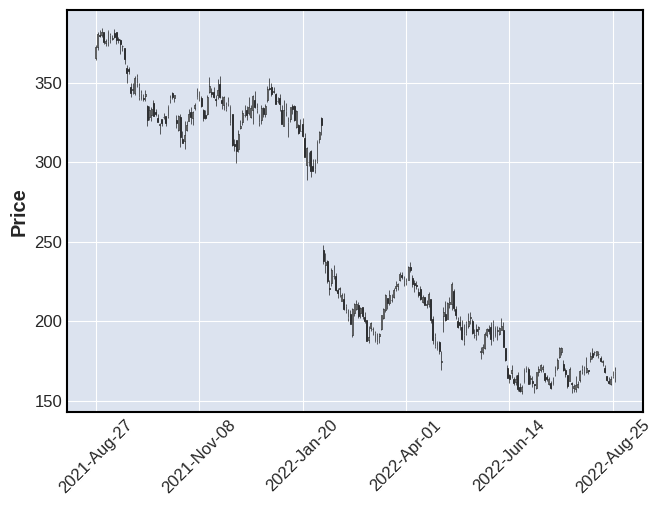

<Figure size 640x480 with 0 Axes>

In [9]:
mpf.plot(yahoo.drop('Adj Close', axis=1), type='candle')
plt.tight_layout()

In [11]:
# FRED data

start = datetime(2010, 1, 1)

end = datetime(2022, 1, 1)

gdp = web.DataReader('GDP', 'fred', start, end)

gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2010-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     49 non-null     float64
dtypes: float64(1)
memory usage: 784.0 bytes


In [12]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2010-01-01 to 2022-01-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  145 non-null    float64
 1   CPILFESL  145 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


In [13]:
# World Bank

from pandas_datareader import wb
gdp_variables = wb.search('gdp.*capita.*const')
gdp_variables.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10522,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10524,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10526,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10527,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [14]:
wb_data = wb.download(indicator='NY.GDP.PCAP.KD', 
                      country=['US', 'CH', 'IN'], 
                      start=1990, 
                      end=2022)
wb_data.head()

NY.GDP.PCAP.KD
country     year                
Switzerland 2021    88224.140317
            2020    85685.290273
            2019    88413.191708
            2018    87980.670685
            2017    86119.145373

In [17]:
df = web.DataReader('TUD', 'oecd', start='2010', end='2019')
df[['Japan', 'United States']]

Country,Japan,United States
Frequency,Annual,Annual
Measure,Percentage of employees,Percentage of employees
Time,,
2010-01-01,18.400000,11.4
2011-01-01,19.000000,11.3
2012-01-01,18.000000,10.8
2013-01-01,17.799999,10.8
2014-01-01,17.600000,10.7
2015-01-01,17.400000,10.3
2016-01-01,17.000000,10.1


In [18]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
symbols.head()

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAA,True,Listed Funds Trust AAF First Priority CLO Bond...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,Z,,True,100.0,False,NaN,AAAU,AAAU,False
AAC,True,Ares Acquisition Corporation Class A Ordinary ...,N,,False,100.0,False,NaN,AAC,AAC,False
